<a href="https://colab.research.google.com/github/yj0905/2020/blob/master/lesson2_sgd_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *
import torch

In this part of the lecture we explain Stochastic Gradient Descent (SGD, 확률적 경사 하강법) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

선형회귀: 점들을 직선으로 표현

In [0]:
n=100

In [3]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5] #nX2 matrix -1~0(rand float),1 5줄

tensor([[-0.8508,  1.0000],
        [-0.3980,  1.0000],
        [ 0.7131,  1.0000],
        [-0.8310,  1.0000],
        [-0.4275,  1.0000]])

In [4]:
a = tensor(3.,2); a #tensor

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n) #@:벡터곱

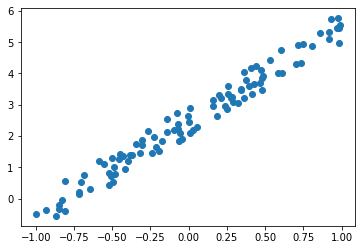

In [7]:
plt.scatter(x[:,0], y); #산포도

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean() #손실함수

평균 제곱 오차(MSE)
$${\sum(\hat{y}-y)^2 \over n}$$

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [43]:
y_hat = x@a
mse(y_hat, y) #손실 계산

tensor(7.1692)

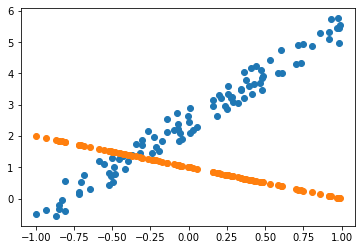

In [44]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat); #산포도

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

그라디언트 계산해서 기울기 일치시키자!

In [100]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()
#y hat 계산->MSE 계산->10주기마다 결과 출력. 그라디언트 계산->(계수)-(grad): 손실 최소화하기

In [102]:
lr = 1e-1
for t in range(100): update()
#update() 100회 반복.

tensor(7.1692, grad_fn=<MeanBackward0>)
tensor(1.5037, grad_fn=<MeanBackward0>)
tensor(0.5132, grad_fn=<MeanBackward0>)
tensor(0.2143, grad_fn=<MeanBackward0>)
tensor(0.1215, grad_fn=<MeanBackward0>)
tensor(0.0927, grad_fn=<MeanBackward0>)
tensor(0.0837, grad_fn=<MeanBackward0>)
tensor(0.0809, grad_fn=<MeanBackward0>)
tensor(0.0801, grad_fn=<MeanBackward0>)
tensor(0.0798, grad_fn=<MeanBackward0>)


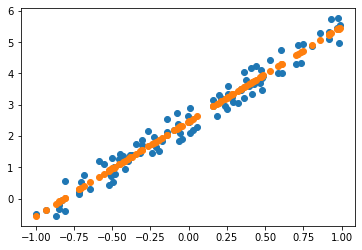

In [103]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],(x@a).detach().numpy());
#원본 파일대로 plt.scatter(x[:,0],(x@a);만 하면 runtimeError가 뜨면서 노란 점이 찍히질 않습니다.
#아래 링크로 해결은 했습니다만 왜 이렇게 해야 해결되는지 모르겠습니다.
#colab에서만 이런 것 같습니다.

[링크](https://forums.fast.ai/t/lesson-2-gsd-plot-issue/61622)

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml') #애니메이션 플러그인 설치

In [106]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20) #애니메이션보이기

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.